In [1]:
%matplotlib inline

In [2]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from vtk_rw import read_vtk
import lmfit
import pandas as pd
from plotting import plot_surf_stat_map, crop_img, plot_surf_label

/home/raid3/huntenburg/workspace/anaconda2/envs/myelinconnect/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


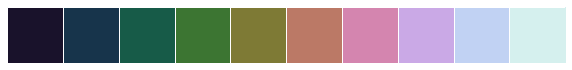

In [3]:
colors = sns.color_palette('cubehelix', 10)
sns.palplot(colors)

### Load data

In [4]:
hemi='rh'

mesh_file = '/scr/ilz3/myelinconnect/all_data_on_simple_surf/surfs/lowres_%s_d.vtk'%hemi
sulc_file = '/scr/ilz3/myelinconnect/all_data_on_simple_surf/surfs/lowres_%s_d_sulc.npy'%hemi
mask_file = '/scr/ilz3/myelinconnect/all_data_on_simple_surf/masks/%s_fullmask.npy'%hemi
embed_file='/scr/ilz3/myelinconnect/all_data_on_simple_surf/embed/connectivity/%s_smooth_3_embed_10.npy'%hemi
t1_file = '/scr/ilz3/myelinconnect/all_data_on_simple_surf/t1/smooth_3/avg_%s_profiles_smooth_3.npy'%hemi

In [131]:
vertices,faces,d = read_vtk(mesh_file)
mask = np.load(mask_file)
embedding = np.load(embed_file)
t1_profiles = np.load(t1_file)
sulc = np.load(sulc_file)

### Mask and average

In [6]:
t1_profiles[mask]=0
t1_avg = np.mean(t1_profiles[:,3:8], axis=1)

In [7]:
scatter_t1avg = np.delete(t1_avg, mask)
scatter_embed = np.delete(embedding, mask, axis=0)

t1_idx=np.where(scatter_t1avg<=1500)
scatter_t1avg = np.delete(scatter_t1avg, t1_idx)
scatter_embed = np.delete(scatter_embed, t1_idx, axis=0)

### Plot 2D histogramms

In [8]:
sns.set_style('darkgrid')
sns.set_context('notebook', font_scale=1.3)

In [9]:
fc_pos_mask = np.where(scatter_embed[:,0]<0)
fc_neg_mask = np.where(scatter_embed[:,0]>-0)

scatter_embed_pos = np.delete(scatter_embed, fc_pos_mask, axis=0)
scatter_embed_neg = np.delete(scatter_embed, fc_neg_mask, axis=0)

scatter_t1avg_pos = np.delete(scatter_t1avg, fc_pos_mask)
scatter_t1avg_neg = np.delete(scatter_t1avg, fc_neg_mask)

In [10]:
t1_pos_mask = np.where(scatter_t1avg_pos<1950)
scatter_embed_pos_zoom = np.delete(scatter_embed_pos, t1_pos_mask, axis=0)
scatter_t1avg_pos_zoom = np.delete(scatter_t1avg_pos, t1_pos_mask)

In [11]:
t1_pos_mask2 = np.where(scatter_t1avg_pos>1950)
scatter_embed_pos_zoom2 = np.delete(scatter_embed_pos, t1_pos_mask2, axis=0)
scatter_t1avg_pos_zoom2 = np.delete(scatter_t1avg_pos, t1_pos_mask2)

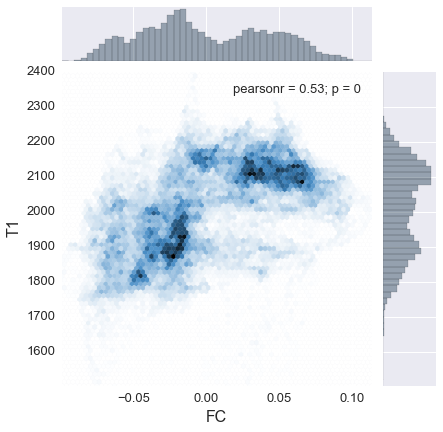

In [12]:
g = sns.jointplot(scatter_embed[:,0], scatter_t1avg, kind="hex", size=6, color=colors[1])
g.set_axis_labels('FC', 'T1', fontsize=16)

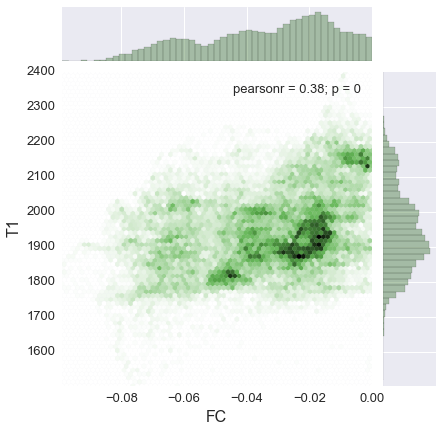

In [13]:
g = sns.jointplot(scatter_embed_neg[:,0], scatter_t1avg_neg, kind="hex", size=6, color=colors[3])
g.set_axis_labels('FC', 'T1', fontsize=16)

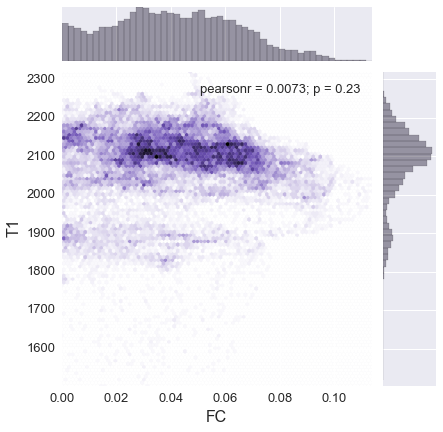

In [14]:
g = sns.jointplot(scatter_embed_pos[:,0], scatter_t1avg_pos, kind="hex", size=6, color=colors[0])
g.set_axis_labels('FC', 'T1', fontsize=16)

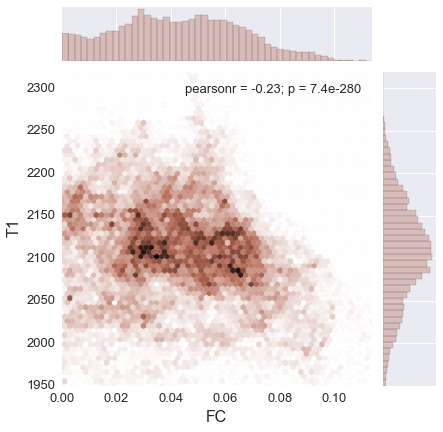

In [15]:
g = sns.jointplot(scatter_embed_pos_zoom[:,0], scatter_t1avg_pos_zoom, kind="hex", size=6, color=colors[5])
g.set_axis_labels('FC', 'T1', fontsize=16)

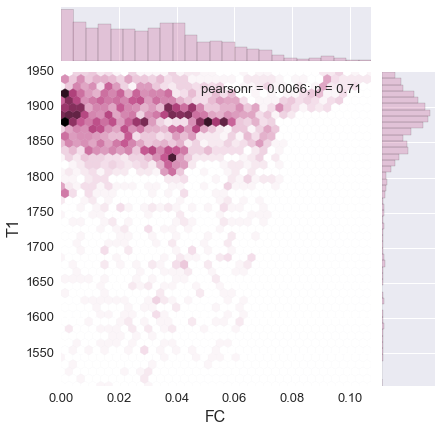

In [16]:
sns.set_style('darkgrid')
g = sns.jointplot(scatter_embed_pos_zoom2[:,0], scatter_t1avg_pos_zoom2, kind="hex", size=6, color=colors[6])
g.set_axis_labels('FC', 'T1', fontsize=16)

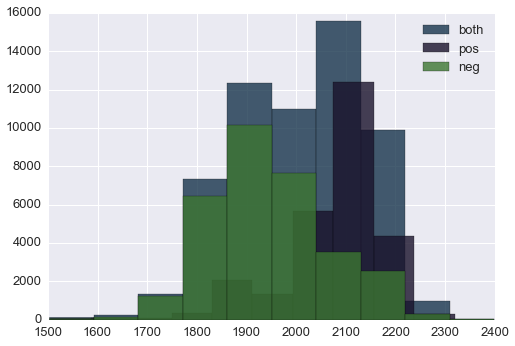

In [17]:
plt.hist(scatter_t1avg,alpha=0.8, color=colors[1], label='both')
plt.hist(scatter_t1avg_pos,alpha=0.8, color=colors[0], label='pos')
plt.hist(scatter_t1avg_neg,alpha=0.8, color=colors[3], label='neg')
plt.legend()

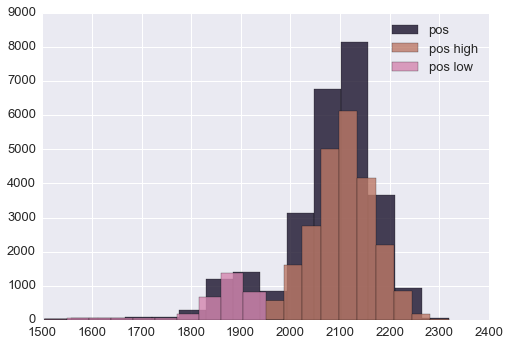

In [18]:
sns.set_style('darkgrid')
plt.hist(scatter_t1avg_pos,alpha=0.8, color=colors[0], label='pos', bins=15)
plt.hist(scatter_t1avg_pos_zoom,alpha=0.8, color=colors[5], label='pos high')
plt.hist(scatter_t1avg_pos_zoom2,alpha=0.8, color=colors[6], label='pos low')
plt.legend()

### Stats

In [20]:
import scipy.stats as stats

In [21]:
print 'Divide at FC=0', stats.ttest_ind(scatter_t1avg_neg, scatter_t1avg_pos)
print 'Divide at T1=1950', stats.ttest_ind(scatter_t1avg_pos_zoom, scatter_t1avg_pos_zoom2)

Divide at FC=0 Ttest_indResult(statistic=-144.12562696102137, pvalue=0.0)
Divide at T1=1950 Ttest_indResult(statistic=215.96684976986353, pvalue=0.0)


In [22]:
print 'Correlation T1~neg FC', stats.pearsonr(scatter_embed_neg[:,0], scatter_t1avg_neg)
print 'Correlation T1~pos FC, T1>1950', stats.pearsonr(scatter_embed_pos_zoom[:,0], scatter_t1avg_pos_zoom)
print ''
print 'Correlation T1~pos FC', stats.pearsonr(scatter_embed_pos[:,0], scatter_t1avg_pos)
print 'Correlation T1~pos FC, T1<1950', stats.pearsonr(scatter_embed_pos_zoom2[:,0], scatter_t1avg_pos_zoom2)


Correlation T1~neg FC (0.38130758858521085, 0.0)
Correlation T1~pos FC, T1>1950 (-0.23030255542198783, 7.4178644295093864e-280)

Correlation T1~pos FC (0.0072748665439702313, 0.23403056311362125)
Correlation T1~pos FC, T1<1950 (0.0065793861888671064, 0.70509818081061537)


### Where are the clusters?

In [191]:
fc=embedding[:,0]
fc[mask]=0
neg = np.where(embedding[:,0]<0)[0]
pos_low = np.where((embedding[:,0] >0) & (t1_avg <1950))[0]
pos_high = np.where((embedding[:,0] >0) & (t1_avg > 1950))[0]

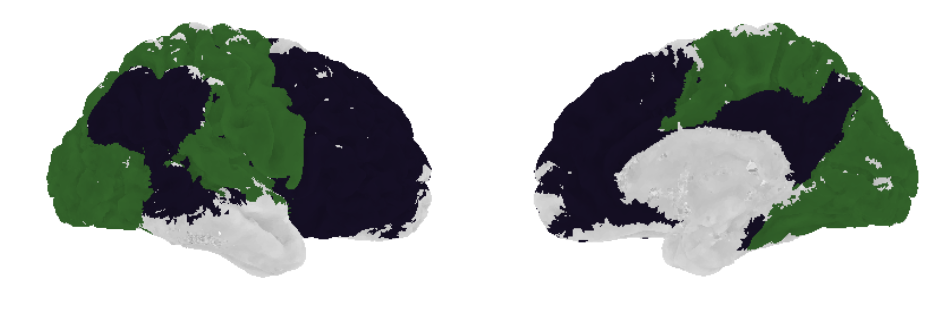

In [193]:
sns.set_style('white')
lat=plot_surf_label(vertices, faces, labels=[neg, pos_low, pos_high], bg_map=sulc, bg_on_labels=True, 
                darkness=0.5, figsize=(11,10), azim=0, elev=180, cpal=[colors[3], colors[0], colors[0]])

sns.set_style('white')
med=plot_surf_label(vertices, faces, labels=[neg, pos_low, pos_high], bg_map=sulc, bg_on_labels=True, 
                darkness=0.5, figsize=(11,10), azim=180, elev=180, cpal=[colors[3], colors[0], colors[0]])
        
lat_crop=crop_img(lat)
med_crop=crop_img(med)

fig=plt.figure()
fig.set_size_inches(16, 8)
ax1 = fig.add_subplot(121)
plt.imshow(lat_crop)
ax1.set_axis_off()
ax2 = fig.add_subplot(122)
plt.imshow(med_crop)
ax2.set_axis_off()

#fig.savefig(fig_file % (method, hemi, str(e+1)))
#plt.close(fig)

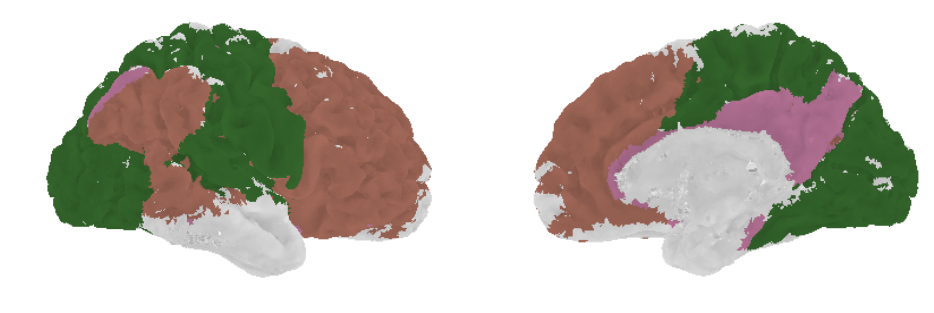

In [192]:
sns.set_style('white')
lat=plot_surf_label(vertices, faces, labels=[neg, pos_low, pos_high], bg_map=sulc, bg_on_labels=True, 
                darkness=0.5, figsize=(11,10), azim=0, elev=180, cpal=[colors[3], colors[6], colors[5]])

sns.set_style('white')
med=plot_surf_label(vertices, faces, labels=[neg, pos_low, pos_high], bg_map=sulc, bg_on_labels=True, 
                darkness=0.5, figsize=(11,10), azim=180, elev=180, cpal=[colors[3], colors[6], colors[5]])
        
lat_crop=crop_img(lat)
med_crop=crop_img(med)

fig=plt.figure()
fig.set_size_inches(16, 8)
ax1 = fig.add_subplot(121)
plt.imshow(lat_crop)
ax1.set_axis_off()
ax2 = fig.add_subplot(122)
plt.imshow(med_crop)
ax2.set_axis_off()

#fig.savefig(fig_file % (method, hemi, str(e+1)))
#plt.close(fig)

### Model

In [24]:
def custom_plot(x, y, res, xlabel=None, ylabel=None, label=None, data_color=colors[1]):
    fig=plt.figure(figsize=(12,5))
    fig.add_subplot(121)
    plt.plot(x, y, alpha=0.1, marker='.', linestyle='None', color=data_color)
    plt.plot(x, res.best_fit, color='black', linestyle='None', marker='.', markersize=.5)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    fig.add_subplot(122)
    res.plot_residuals(data_kws={'alpha':0.1, 'color':'grey', 'marker':'.'}, fit_kws={'color':'k', 'linewidth':2})
    plt.suptitle(label)
    
def custom_report(res, label):
    print label ###
    #print res.fit_report()
    print 'BIC', res.bic
    print 'AIC', res.aic
    print ''
    
def fit_simple(model, x, y, xlabel, ylabel, label, color):
    
    pars = model.guess(y, x=x)
    out = model.fit(y, pars, x=x)
    
    custom_report(out, label)
    custom_plot(x,y, out, xlabel=xlabel, ylabel=ylabel, label=label, data_color=color)
    
    return out


def fit_composite_const(model, x, y, xlabel, ylabel, label, color):
    
    const_model = lmfit.models.LinearModel(prefix='const_')
    const_model.set_param_hint(name='slope', value=0, vary=False)
    comp_model = model + const_model
    
    pars = const_model.make_params(intercept=y.min())
    pars += model.guess(y, x=x)
    out = comp_model.fit(y, pars, x=x)
    
    custom_report(out, label)
    custom_plot(x,y, out, xlabel=xlabel, ylabel=ylabel, label=label, data_color=color)
    
    return out

### Neg FC: Polynomial model degree 0 to 7

Degree 0
BIC 306939.842002
AIC 306931.463523

Degree 1
BIC 301898.355065
AIC 301881.598107

Degree 2
BIC 301300.65706
AIC 301275.521624

Degree 3
BIC 300946.996052
AIC 300913.482137

Degree 4
BIC 300958.348443
AIC 300916.456049

Degree 5
BIC 300895.771063
AIC 300845.50019

Degree 6
BIC 300904.309025
AIC 300845.659674

Degree 7
BIC 300897.22896
AIC 300830.20113



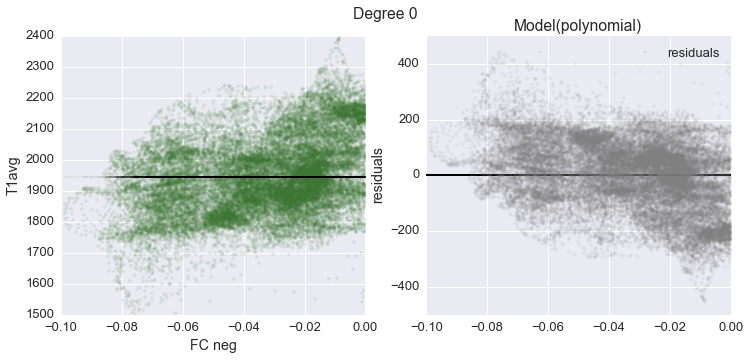

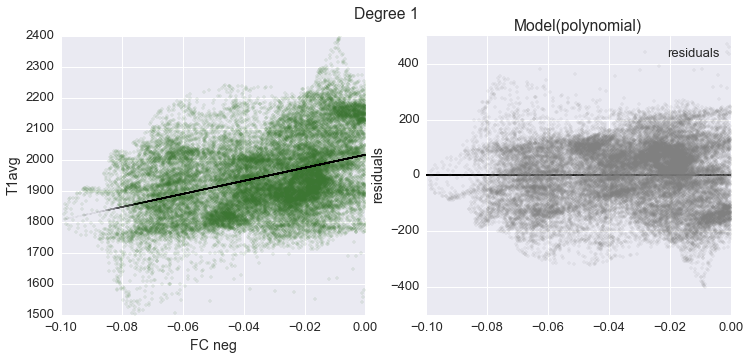

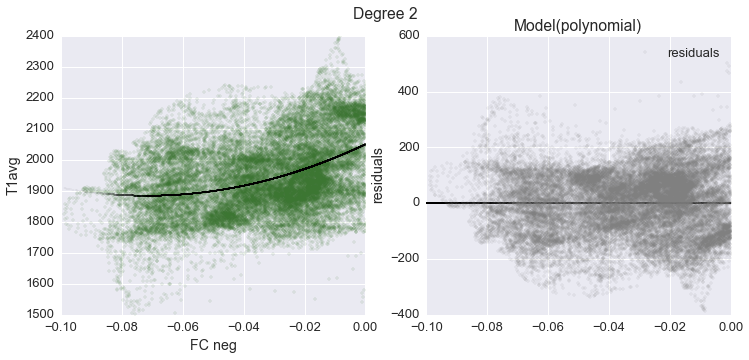

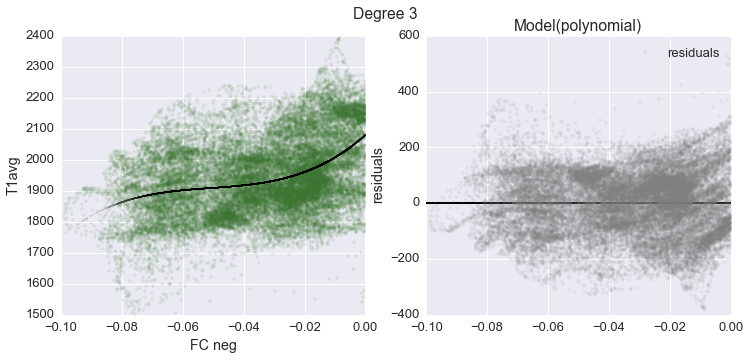

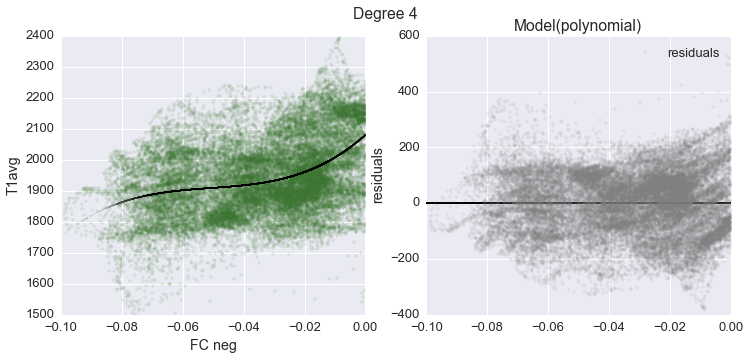

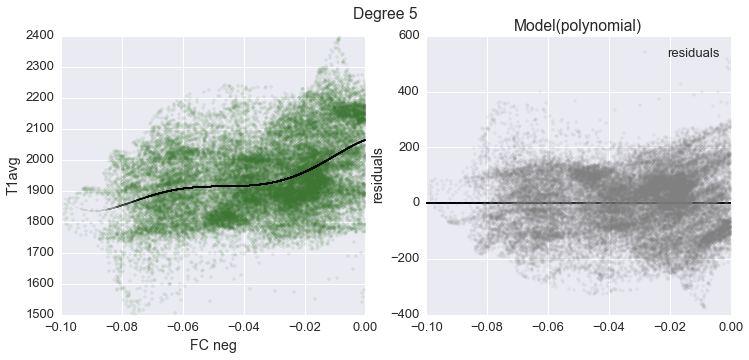

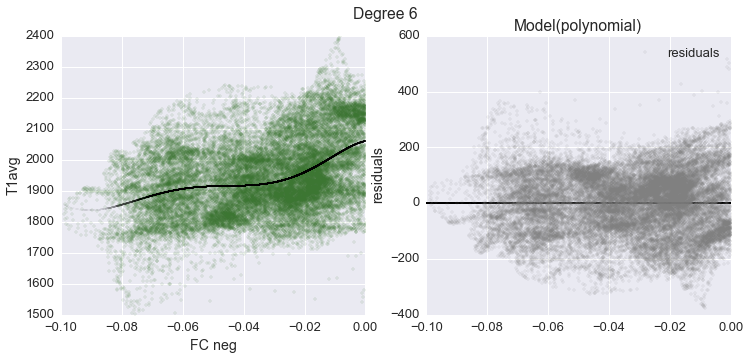

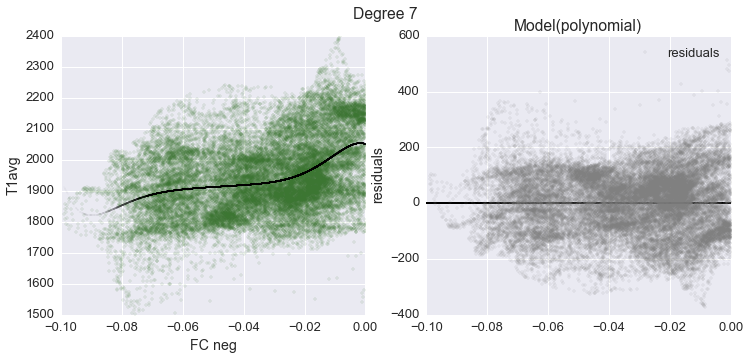

In [25]:
res_neg = []
for p in range(8):

    mod_neg = fit_simple(lmfit.models.PolynomialModel(degree=p), 
                        x=scatter_embed_neg[:,0], y=scatter_t1avg_neg,
                        xlabel='FC neg',
                        ylabel='T1avg',
                         label='Degree %i'%p, 
                        color=colors[3])
    res_neg.append(mod_neg)
    
    


### Neg FC: Step functions plus constant

Step form linear
BIC 301420.748417
AIC 301387.234502

Step form atan
BIC 301047.758635
AIC 301014.24472

Step form logistic
BIC 301089.689728
AIC 301056.175813

Step form erf
BIC 301092.697034
AIC 301059.183119



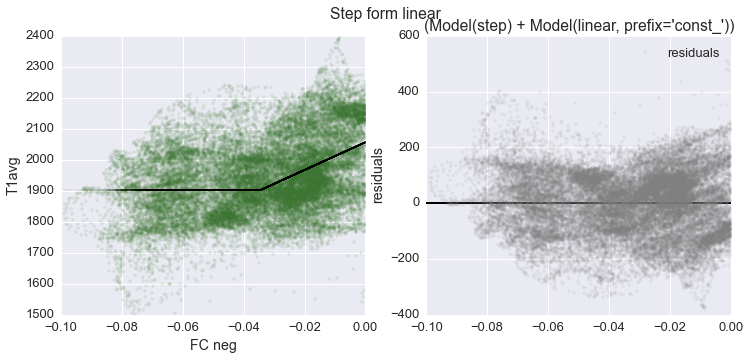

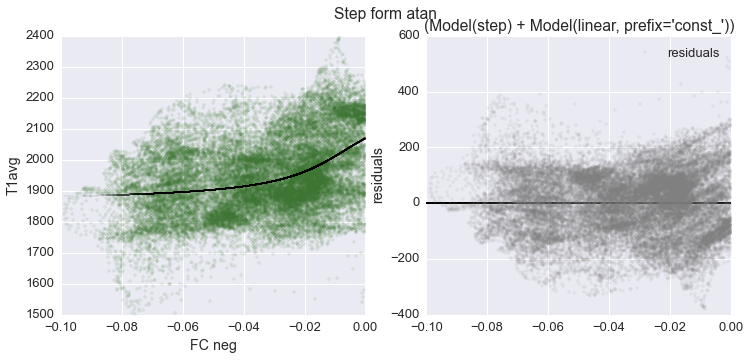

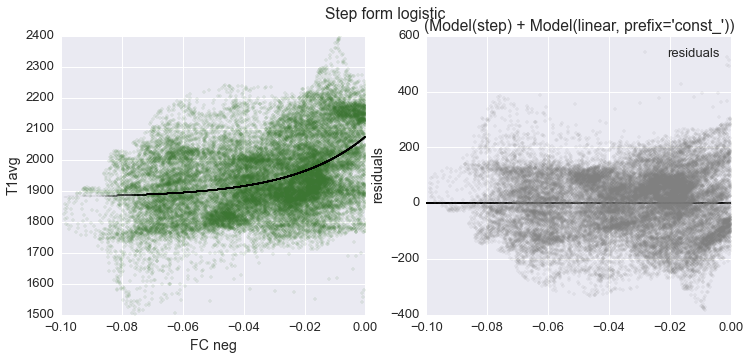

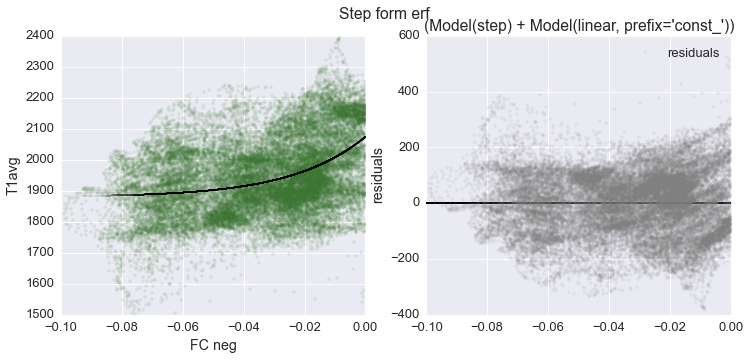

In [27]:
for f in ['linear', 'atan', 'logistic', 'erf']:

    mod_neg = fit_composite_const(lmfit.models.StepModel(form=f), 
                                    x=scatter_embed_neg[:,0], y=scatter_t1avg_neg,
                                    xlabel='FC neg',
                                    ylabel='T1avg',
                                    label='Step form %s'%f, 
                                    color=colors[3])
    
    res_neg.append(mod_neg)

### Pos FC, high T1: Polynomial degree 0-7

Degree 0
BIC 191448.037524
AIC 191439.974898

Degree 1
BIC 190181.130291
AIC 190165.005039

Degree 2
BIC 188930.500444
AIC 188906.312567

Degree 3
BIC 188883.486605
AIC 188851.236102

Degree 4
BIC 188715.863692
AIC 188675.550564

Degree 5
BIC 188717.207252
AIC 188668.831498

Degree 6
BIC 188675.850586
AIC 188619.412206

Degree 7
BIC 188685.787033
AIC 188621.286026



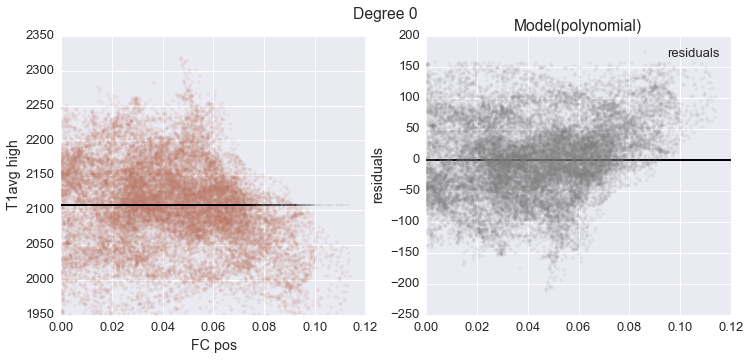

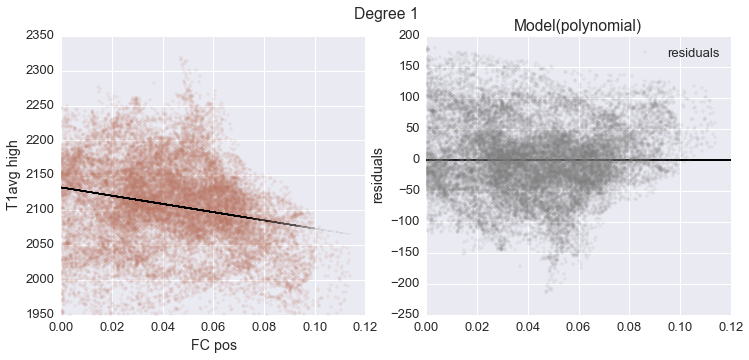

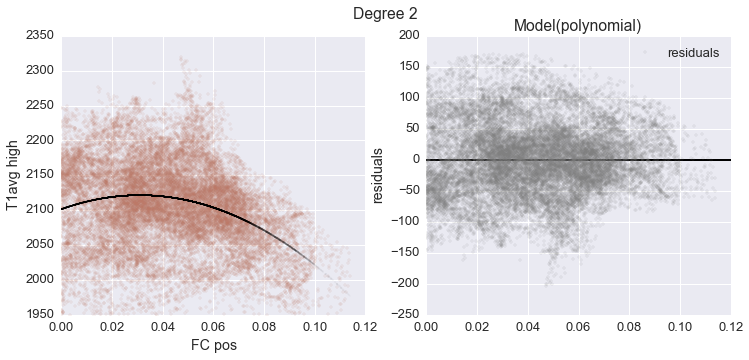

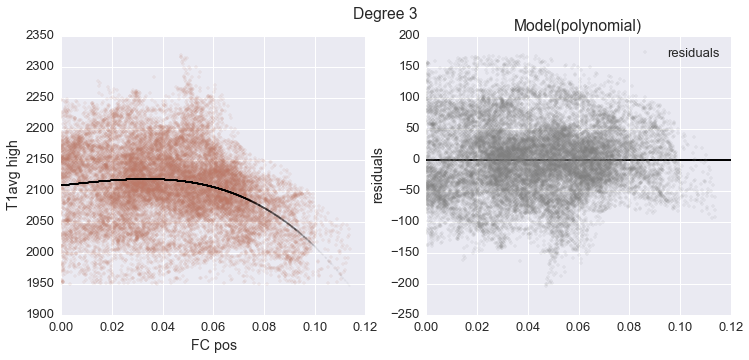

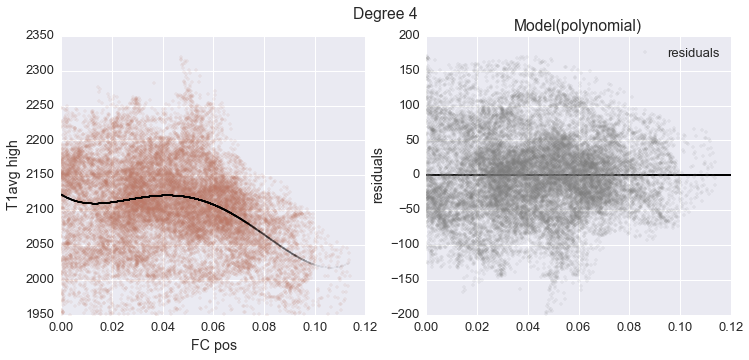

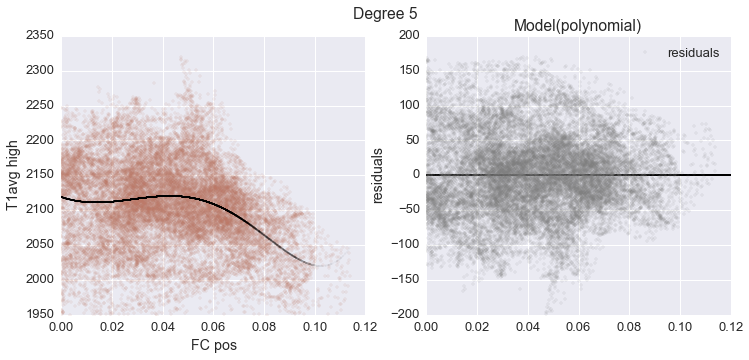

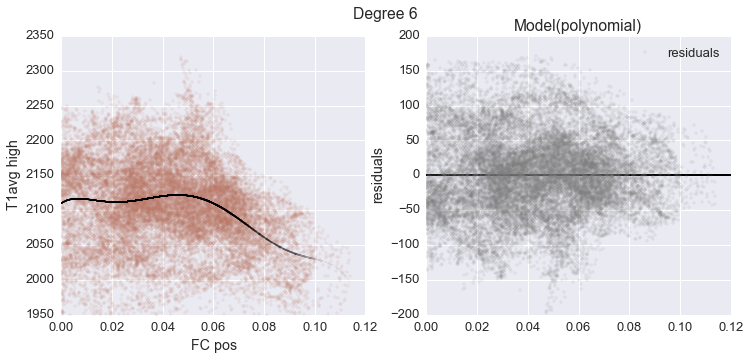

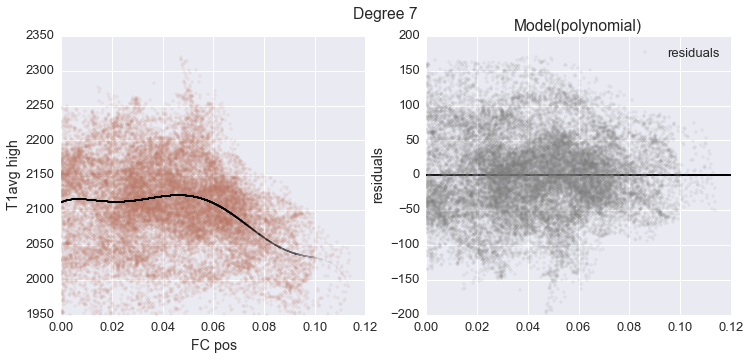

In [36]:
res_pos_high = []
for p in range(8):
    
    mod_pos_high = fit_simple(lmfit.models.PolynomialModel(degree=p), 
                        x=scatter_embed_pos_zoom[:,0], y=scatter_t1avg_pos_zoom,
                        xlabel='FC pos',
                        ylabel='T1avg high',
                         label='Degree %i'%p, 
                        color=colors[5])
    res_pos_high.append(mod_pos_high)

Step form linear
BIC 188687.717942
AIC 188655.467439

Step form atan
BIC 188797.045868
AIC 188764.795365

Step form logistic
BIC 188729.196872
AIC 188696.946368

Step form erf
BIC 188714.224482
AIC 188681.973979



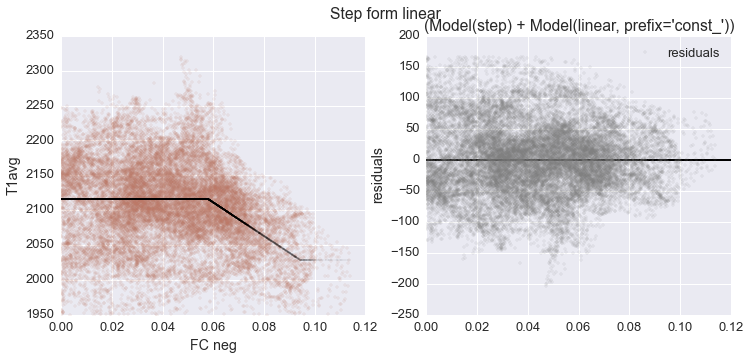

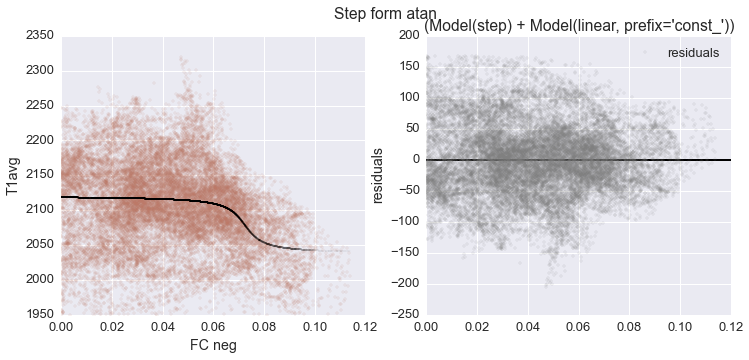

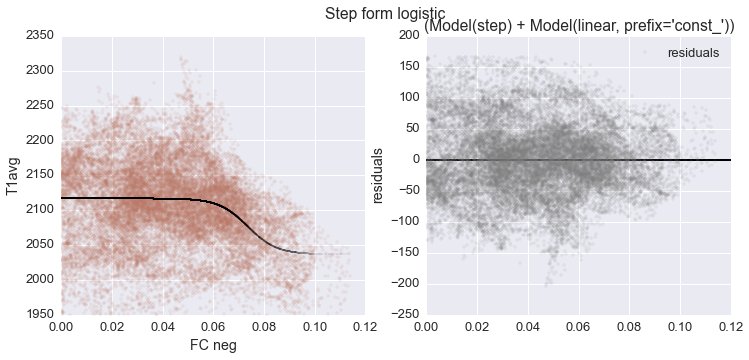

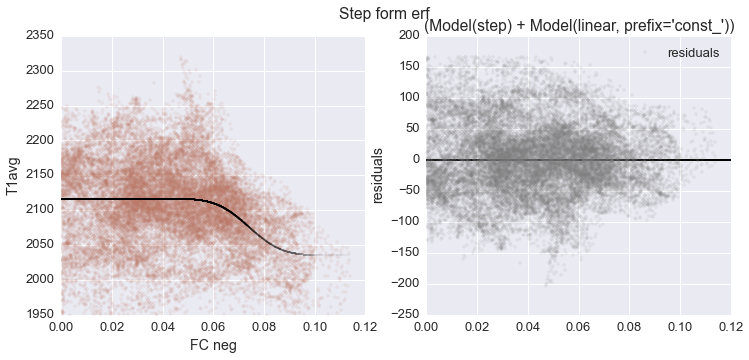

In [37]:
for f in ['linear', 'atan', 'logistic', 'erf']:

    mod_pos_high = fit_composite_const(lmfit.models.StepModel(form=f), 
                                    x=scatter_embed_pos_zoom[:,0], y=scatter_t1avg_pos_zoom,
                                    xlabel='FC neg',
                                    ylabel='T1avg',
                                    label='Step form %s'%f, 
                                    color=colors[5])
    
    res_pos_high.append(mod_pos_high)

### Compare different models

In [96]:
names = ['Poly %i'%(x) for x in range(8)]+['Step %s'%y for y in ['linear', 'atan', 'logistic', 'erf']]

df = pd.DataFrame()

df['Value']=[m.bic for m in res_neg]+[m.aic for m in res_neg]
df['Model']=2*names
df['Criterion']=len(res_neg)*['BIC neg']+len(res_neg)*['AIC neg']


df2 = pd.DataFrame()
df2['Value']=[m.bic for m in res_pos_high]+[m.aic for m in res_pos_high]
df2['Model']=2*names
df2['Criterion']=len(res_pos_high)*['BIC pos/high']+len(res_pos_high)*['AIC pos/high']

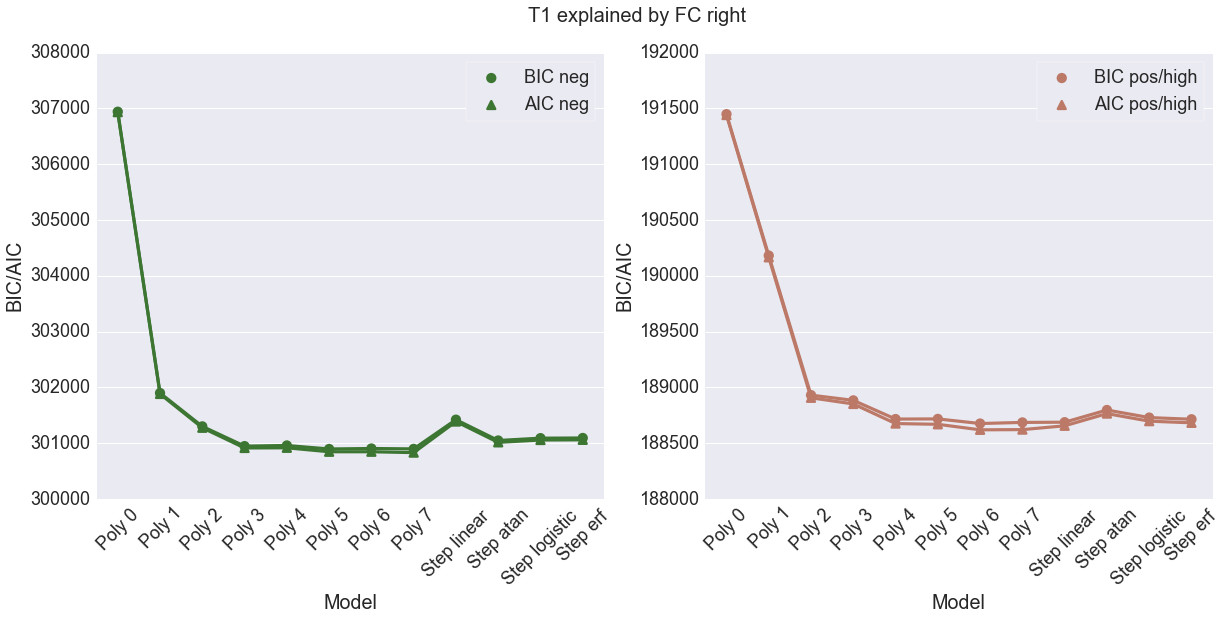

In [97]:
sns.set_context('notebook', font_scale=1.8)

fig=plt.figure(figsize=(20,8))
fig.add_subplot(121)
sns.pointplot(data=df, x='Model', y='Value', hue='Criterion', linewidth=0,
              markers=['o', '^'],
             palette=[colors[3], colors[3]])
plt.legend(loc=1, frameon=True)
plt.ylabel('BIC/AIC')
plt.xticks(rotation=45)

fig.add_subplot(122)
sns.pointplot(data=df2, x='Model', y='Value', hue='Criterion', linewidth=0,
              markers=['o', '^'],
             palette=[colors[5], colors[5]]),

plt.legend(loc=1, frameon=True)
plt.ylabel('BIC/AIC')
plt.xticks(rotation=45)

if hemi=='lh':
    hemistring='left'
elif hemi=='rh':
    hemistring='right'
else:
    hemistring='both'
plt.suptitle('T1 explained by FC %s'%hemistring, fontsize=20)

In [123]:
df_corr = pd.DataFrame()
df_corr['Model'] = 2*names[1:]
df_corr['FC'] = (len(names)-1)*['neg']+(len(names)-1)*['pos/high']
df_corr['Fit'] = [stats.pearsonr(j.best_fit, scatter_t1avg_neg)[0] for j in res_neg[1:]] + [stats.pearsonr(k.best_fit, scatter_t1avg_pos_zoom)[0] for k in res_pos_high[1:]]

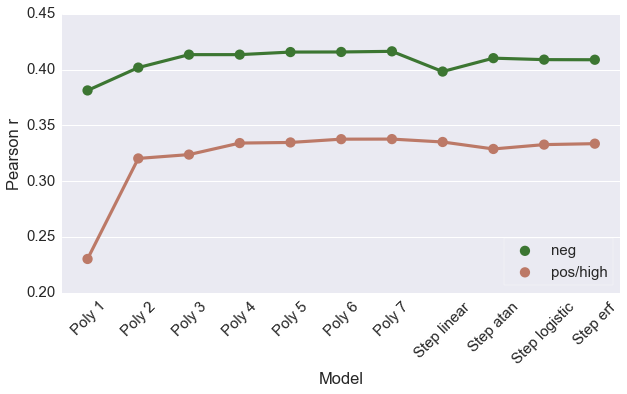

In [127]:
sns.set_context('notebook', font_scale=1.5)

fig=plt.figure(figsize=(10,5))
sns.pointplot(data=df_corr, x='Model', y='Fit', hue='FC', 
             palette=[colors[3], colors[5]])
plt.legend(loc=4, frameon=True)
plt.ylabel('Pearson r')
plt.xticks(rotation=45);

### Look at embedding within the cluster

In [141]:
embed0_pos = embedding[:,0].copy()
embed0_pos[mask] = 0
embed0_pos[np.where(embed0_pos>0)]=0

embed0_neg = embedding[:,0].copy()
embed0_neg[mask] = 0
embed0_neg[np.where(embed0_pos<0)]=0

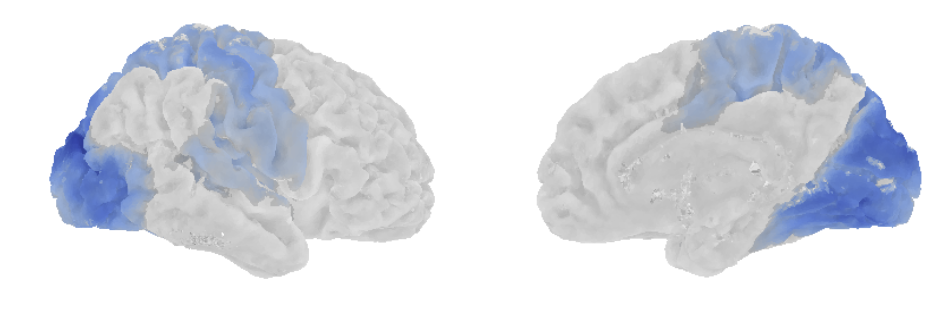

In [142]:
sns.set_style('white')
lat=plot_surf_stat_map(vertices, faces, stat_map=embed0_pos, bg_map=sulc, bg_on_stat=True, threshold=1e-50,
                darkness=0.5, figsize=(11,10), azim=0, elev=180)

sns.set_style('white')
med=plot_surf_stat_map(vertices, faces, stat_map=embed0_pos, bg_map=sulc, bg_on_stat=True, threshold=1e-50,
                darkness=0.5, figsize=(11,10), azim=180, elev=180)

        
lat_crop=crop_img(lat)
med_crop=crop_img(med)

fig=plt.figure()
fig.set_size_inches(16, 8)
ax1 = fig.add_subplot(121)
plt.imshow(lat_crop)
ax1.set_axis_off()
ax2 = fig.add_subplot(122)
plt.imshow(med_crop)
ax2.set_axis_off()

#fig.savefig(fig_file % (method, hemi, str(e+1)))
#plt.close(fig)

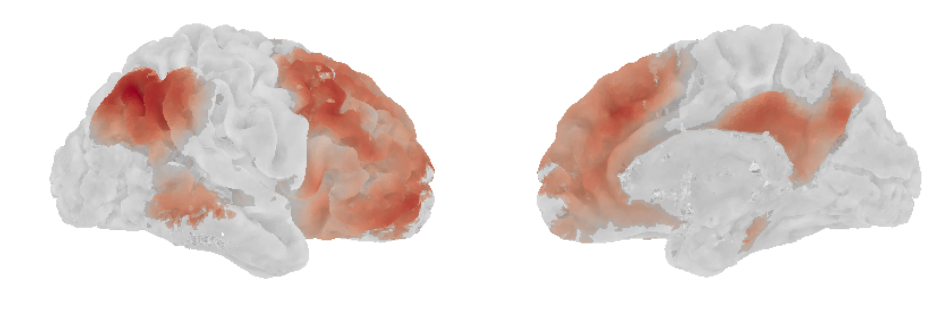

In [143]:
sns.set_style('white')
lat=plot_surf_stat_map(vertices, faces, stat_map=embed0_neg, bg_map=sulc, bg_on_stat=True, threshold=1e-50,
                darkness=0.5, figsize=(11,10), azim=0, elev=180)

sns.set_style('white')
med=plot_surf_stat_map(vertices, faces, stat_map=embed0_neg, bg_map=sulc, bg_on_stat=True, threshold=1e-50,
                darkness=0.5, figsize=(11,10), azim=180, elev=180)

        
lat_crop=crop_img(lat)
med_crop=crop_img(med)

fig=plt.figure()
fig.set_size_inches(16, 8)
ax1 = fig.add_subplot(121)
plt.imshow(lat_crop)
ax1.set_axis_off()
ax2 = fig.add_subplot(122)
plt.imshow(med_crop)
ax2.set_axis_off()

#fig.savefig(fig_file % (method, hemi, str(e+1)))
#plt.close(fig)

In [139]:
embed1_pos = embedding[:,1].copy()
embed1_pos[mask] = 0
embed1_pos[np.where(embedding[:,0]>0)]=0

embed1_neg = embedding[:,1].copy()
embed1_neg[mask] = 0
embed1_neg[np.where(embedding[:,0]<0)]=0

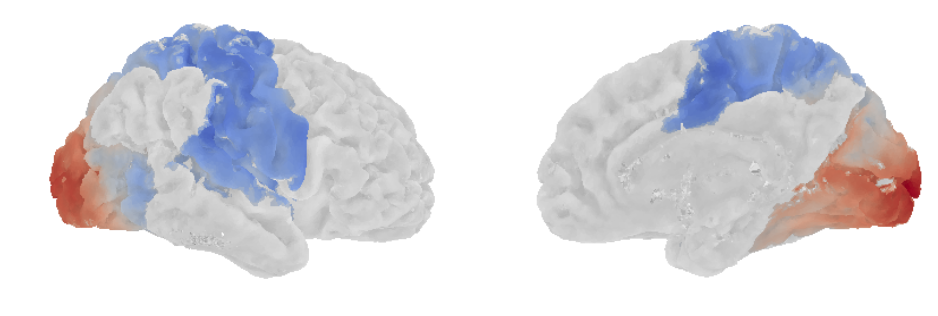

In [138]:
sns.set_style('white')
lat=plot_surf_stat_map(vertices, faces, stat_map=embed1_pos, bg_map=sulc, bg_on_stat=True, threshold=1e-50,
                darkness=0.5, figsize=(11,10), azim=0, elev=180)

sns.set_style('white')
med=plot_surf_stat_map(vertices, faces, stat_map=embed1_pos, bg_map=sulc, bg_on_stat=True, threshold=1e-50,
                darkness=0.5, figsize=(11,10), azim=180, elev=180)

        
lat_crop=crop_img(lat)
med_crop=crop_img(med)

fig=plt.figure()
fig.set_size_inches(16, 8)
ax1 = fig.add_subplot(121)
plt.imshow(lat_crop)
ax1.set_axis_off()
ax2 = fig.add_subplot(122)
plt.imshow(med_crop)
ax2.set_axis_off()

#fig.savefig(fig_file % (method, hemi, str(e+1)))
#plt.close(fig)

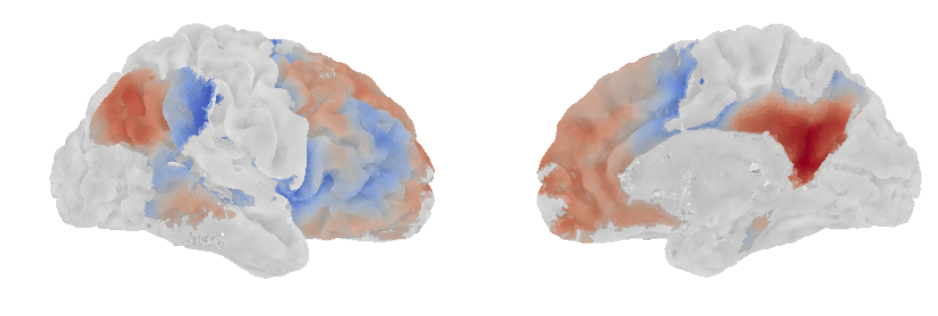

In [140]:
sns.set_style('white')
lat=plot_surf_stat_map(vertices, faces, stat_map=embed1_neg, bg_map=sulc, bg_on_stat=True, threshold=1e-50,
                darkness=0.5, figsize=(11,10), azim=0, elev=180)

sns.set_style('white')
med=plot_surf_stat_map(vertices, faces, stat_map=embed1_neg, bg_map=sulc, bg_on_stat=True, threshold=1e-50,
                darkness=0.5, figsize=(11,10), azim=180, elev=180)

        
lat_crop=crop_img(lat)
med_crop=crop_img(med)

fig=plt.figure()
fig.set_size_inches(16, 8)
ax1 = fig.add_subplot(121)
plt.imshow(lat_crop)
ax1.set_axis_off()
ax2 = fig.add_subplot(122)
plt.imshow(med_crop)
ax2.set_axis_off()

#fig.savefig(fig_file % (method, hemi, str(e+1)))
#plt.close(fig)

In [144]:
embed2_pos = embedding[:,2].copy()
embed2_pos[mask] = 0
embed2_pos[np.where(embedding[:,0]>0)]=0

embed2_neg = embedding[:,2].copy()
embed2_neg[mask] = 0
embed2_neg[np.where(embedding[:,0]<0)]=0

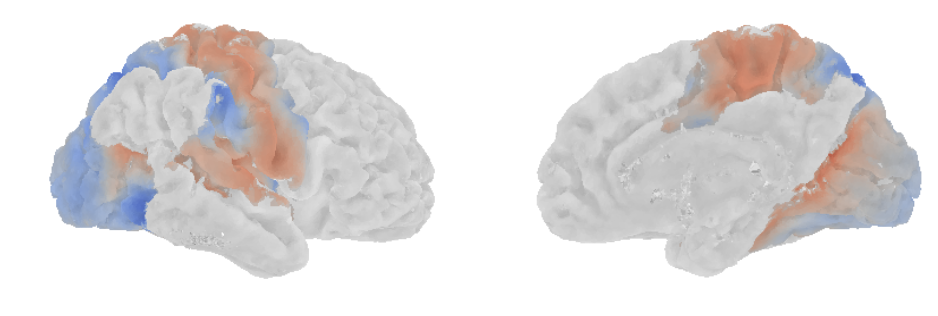

In [145]:
sns.set_style('white')
lat=plot_surf_stat_map(vertices, faces, stat_map=embed2_pos, bg_map=sulc, bg_on_stat=True, threshold=1e-50,
                darkness=0.5, figsize=(11,10), azim=0, elev=180)

sns.set_style('white')
med=plot_surf_stat_map(vertices, faces, stat_map=embed2_pos, bg_map=sulc, bg_on_stat=True, threshold=1e-50,
                darkness=0.5, figsize=(11,10), azim=180, elev=180)

        
lat_crop=crop_img(lat)
med_crop=crop_img(med)

fig=plt.figure()
fig.set_size_inches(16, 8)
ax1 = fig.add_subplot(121)
plt.imshow(lat_crop)
ax1.set_axis_off()
ax2 = fig.add_subplot(122)
plt.imshow(med_crop)
ax2.set_axis_off()

#fig.savefig(fig_file % (method, hemi, str(e+1)))
#plt.close(fig)

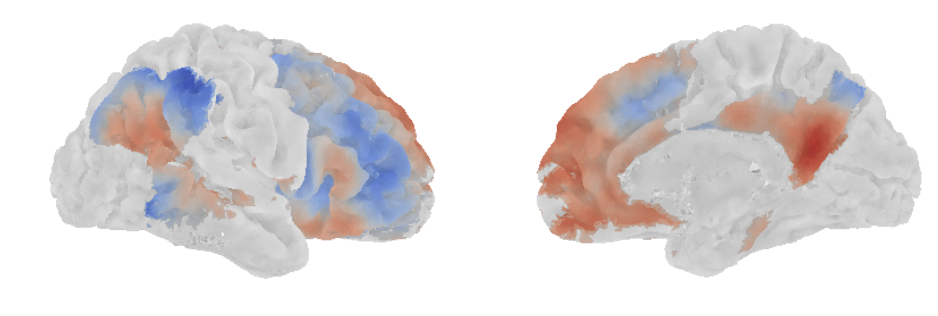

In [146]:
sns.set_style('white')
lat=plot_surf_stat_map(vertices, faces, stat_map=embed2_neg, bg_map=sulc, bg_on_stat=True, threshold=1e-50,
                darkness=0.5, figsize=(11,10), azim=0, elev=180)

sns.set_style('white')
med=plot_surf_stat_map(vertices, faces, stat_map=embed2_neg, bg_map=sulc, bg_on_stat=True, threshold=1e-50,
                darkness=0.5, figsize=(11,10), azim=180, elev=180)

        
lat_crop=crop_img(lat)
med_crop=crop_img(med)

fig=plt.figure()
fig.set_size_inches(16, 8)
ax1 = fig.add_subplot(121)
plt.imshow(lat_crop)
ax1.set_axis_off()
ax2 = fig.add_subplot(122)
plt.imshow(med_crop)
ax2.set_axis_off()

#fig.savefig(fig_file % (method, hemi, str(e+1)))
#plt.close(fig)

In [159]:
embed_mask_pos=np.zeros_like(vertices[:,0])
embed_mask_pos[np.where(embed0_neg>0)]=1
embed_mask_neg=np.zeros_like(vertices[:,0])
embed_mask_neg[np.where(embed0_pos<0)]=1

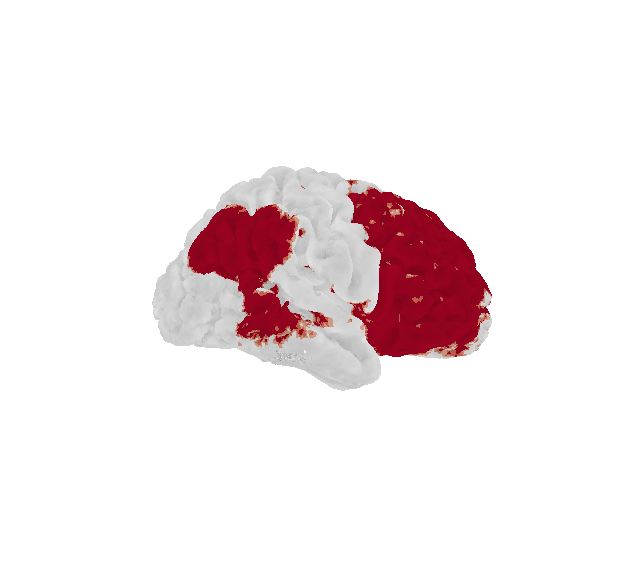

In [155]:
plot=plot_surf_stat_map(vertices, faces, stat_map=embed_mask_pos, bg_map=sulc, bg_on_stat=True, threshold=1e-50,
                darkness=0.5, figsize=(11,10), azim=0, elev=180)

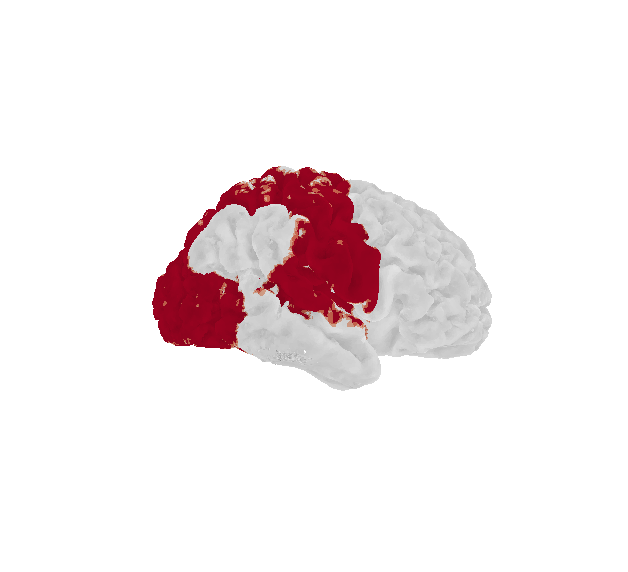

In [160]:
plot=plot_surf_stat_map(vertices, faces, stat_map=embed_mask_neg, bg_map=sulc, bg_on_stat=True, threshold=1e-50,
                darkness=0.5, figsize=(11,10), azim=0, elev=180)

In [163]:
np.save('/scr/ilz3/myelinconnect/all_data_on_simple_surf/embed/connectivity/rh_embed0_pos_mask.npy', embed_mask_pos)

In [164]:
np.save('/scr/ilz3/myelinconnect/all_data_on_simple_surf/embed/connectivity/rh_embed0_neg_mask.npy', embed_mask_neg)